<a href="https://colab.research.google.com/github/SergioManuelJob/NaiveBayes-Model/blob/main/NaiveBayes_Sergio_Manuel_Su%C3%A1rez_Su%C3%A1rez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [19]:
url = '/content/drive/MyDrive/7RO/Tarea NaiveBayes/house-votes-84.data'
header = ["NAME", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16"]
vote_data = pd.read_csv(url, header=None, names=header, na_values='?')
vote_data = vote_data.dropna()
vote_data['NAME'] = vote_data['NAME'].astype('category').cat.codes

In [20]:
for col in vote_data.columns:
    if col != 'NAME':
        vote_data[col] = vote_data[col].map({'y': 1, 'n': 0})

In [31]:
vote_raw_train = vote_data.head(370)
vote_raw_test = vote_data.tail(len(vote_data) - 370)

In [32]:
features = header[1:]
X_train = vote_raw_train[features]
y_train = vote_raw_train['NAME']
X_test = vote_raw_test[features]
y_test = vote_raw_test['NAME']

In [33]:
clf = CategoricalNB(alpha=1.0)
clf.fit(X_train, y_train)

CategoricalNB()

In [38]:
vote_test_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, vote_test_pred)
accuracy = accuracy_score(y_test, vote_test_pred)
print("Matriz de Confusión:")
print(conf_mat)
print("\nExactitud del modelo:", accuracy)

Matriz de Confusión:
[[41  5]
 [ 1 47]]

Exactitud del modelo: 0.9361702127659575


In [39]:
y_probs = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

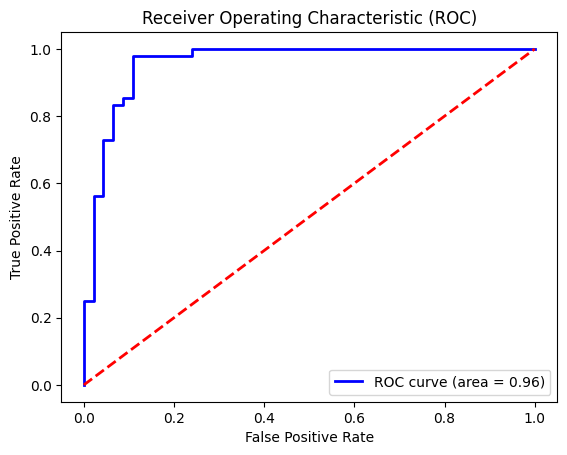

In [40]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [42]:
precision, recall, _ = precision_recall_curve(y_test, y_probs[:, 1])
pr_auc = auc(recall, precision)

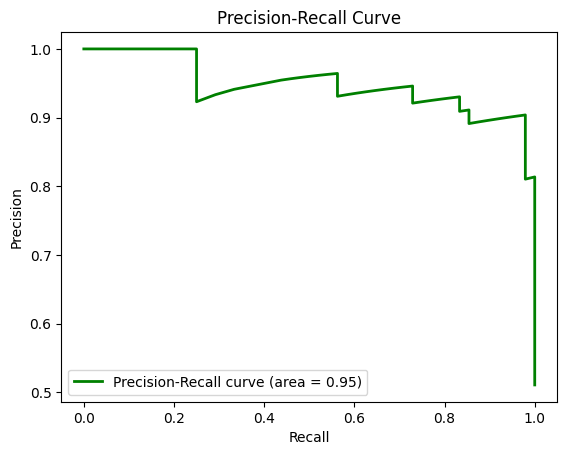

In [43]:
plt.figure()
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [44]:
print("AUC:", roc_auc)

AUC: 0.958786231884058
